In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pathlib import Path
import scipy
import numpy as np
import os,sys

# for windows
'''
currentdir = Path.cwd()
sys.path.insert(0,str(currentdir)+'\\utils') 
'''

# for ubuntu
os.chdir('./utils')
import skseq
import skseq.sequences.structured_perceptron as spc
from utils import *

This notebook loads the data, loads the fitted models from disk and evaluates the models.

## Loading Data

In [2]:
corpus = NerCorpus()

In [3]:
data_path = "../data"

#data_path = parentdir + data_path

train_seq = corpus.read_sequence_list(data_path + "/train_data_ner.csv", 
                                            max_sent_len=100)

test_seq = corpus.read_sequence_list(data_path + "/test_data_ner.csv",
                                           max_sent_len=100)

tiny_test_seq = corpus.read_sequence_list(data_path + "/tiny_test.csv", 
                                          max_sent_len=100)

In [4]:
tiny_test_metrics = {'Accuracy':[],'F1':[]}
names = []

## Tiny test print

In [5]:
print(decode_pred(tiny_test_seq.seq_list, corpus))

The/O programmers/O from/O Barcelona/B-geo might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/B-geo cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/I-per went/O to/O Parris/B-geo ./O 
Jack/B-per London/I-per went/O to/O Paris/B-geo ./O 
Bill/B-per gates/I-per and/O Steve/B-per jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/B-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-geo Arabia/I-geo wanted/O total/O control/O ./O 
Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-geo Arabia/I-geo ./O 
Apple/B-org is/O a/O great/O company/O

## Structure Perceptron

### Structure Perceptron w/ given features

In [6]:
feature_mapper = skseq.sequences.id_feature.IDFeatures(train_seq)
feature_mapper.build_features()

sp = spc.StructuredPerceptron(corpus.word_dict, corpus.tag_dict, feature_mapper)
sp.load_model(dir="../fitted_models/perceptron_5_iter_given")

In [7]:
#pred_train = sp.viterbi_decode_corpus(train_seq)
#pred_test  = sp.viterbi_decode_corpus(test_seq)
pred_tiny_test  = sp.viterbi_decode_corpus(tiny_test_seq)

C:\Users\Alejandro\Documents\UB\NLP\NER_task\utils\utils.py:131: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(class_names), rotation=45)
C:\Users\Alejandro\Documents\UB\NLP\NER_task\utils\utils.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(class_names))


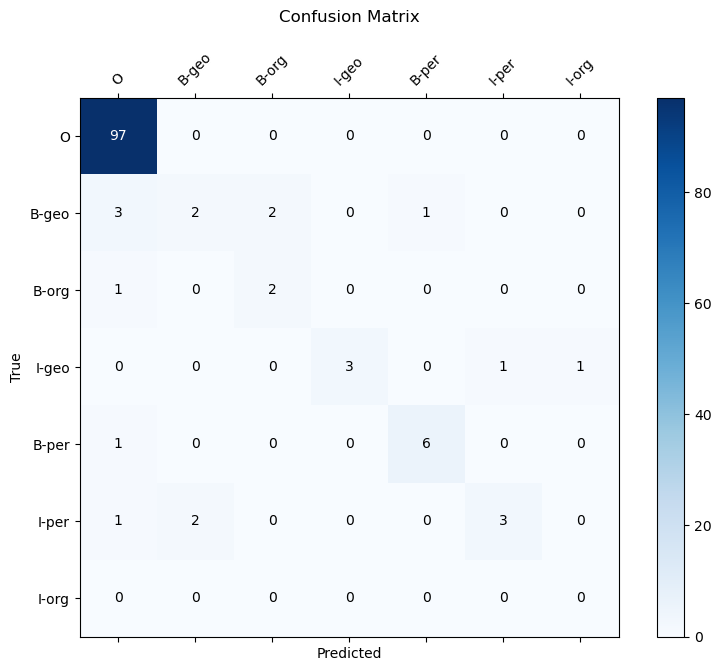

In [8]:
acc, f1 = Evaluate_metrics(tiny_test_seq.seq_list, pred_tiny_test, corpus)
tiny_test_metrics['Accuracy'].append(acc)
tiny_test_metrics['F1'].append(f1)
names.append('SP-given')

In [9]:
print(decode_pred(pred_tiny_test, corpus))

The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O 
Jack/B-per London/B-geo went/O to/O Parris/O ./O 
Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O 
Bill/B-per gates/I-per and/O Steve/B-per jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O 
The/O president/O of/O U.S.A/O thought/O they/O could/O win/O the/O war/O ./O 
The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O 
The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control/O ./O 
Robin/O does/O not/O want/O to/O go/O to/O Saudi/B-org Arabia/I-org ./O 
Apple/O is/O a/O great/O company/O ./O 
I/O really/O love/

### Structure Perceptron w/ extra features

In [ ]:
from skseq.sequences.extended_features import *

feature_mapper_ext = Extended_Features(train_seq)
feature_mapper_ext.build_features()

sp = spc.StructuredPerceptron(corpus.word_dict, corpus.tag_dict, feature_mapper_ext)
sp.load_model(dir="../fitted_models/perceptron_5_iter_extra")

In [ ]:
pred_tiny_test  = sp.viterbi_decode_corpus(tiny_test_seq)

In [ ]:
acc, f1 = Evaluate_metrics(tiny_test_seq.seq_list, pred_tiny_test, corpus)
tiny_test_metrics['Accuracy'].append(acc)
tiny_test_metrics['F1'].append(f1)
names.append('SP-extra')

In [ ]:
print(decode_pred(pred_tiny_test, corpus))

## Deep Learning Approach